In [1]:
import matplotlib.pyplot as plt
import os
from pathlib import Path
from random import randint
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import src.false_labels_effect.util as util

In [2]:
# set training and test img path

train_img_path = Path("../data/Images_4c_Poly/Train")
test_img_path = Path("../data/Images_4c_Poly/Test")

# set label path

train_label_path = Path("../data/Labels_4c_Poly/Train.npy")
test_label_path = Path("../data/Labels_4c_Poly/Test.npy")

# load labels dict
train_labels_dict = util.load_labels(train_label_path)
test_labels_dict = util.load_labels(test_label_path)

In [3]:
# show random example train label
train_exm = "Train_" + str(randint(1, len(train_labels_dict.keys()))).zfill(5)
print(f"Example labels_dict['{train_exm}'] = {train_labels_dict[train_exm]}")

# show random example test label
test_exm = "Test_" + str(randint(1, len(test_labels_dict.keys()))).zfill(5)
print(f"Example labels_dict['{test_exm}'] = {test_labels_dict[test_exm]}")

Example labels_dict['Train_16421'] = {'Img_id': 'Train_16421', 'Class': 'Distortion', 'Subclass': 'Red', 'Annotations': [[74, 66], [157, 17], [319, 192], [110, 403], [74, 66]]}
Example labels_dict['Test_02340'] = {'Img_id': 'Test_02340', 'Class': 'Blur', 'Subclass': None, 'Annotations': [[106, 56], [495, 76], [467, 140], [177, 145], [106, 56]]}


In [4]:
# get all main classes
main_classes_list = []
for label_set in [train_labels_dict.values(), test_labels_dict.values()]:
    for label in label_set:
        main_classes_list.append(label['Class'])

main_classes_set = sorted(set(main_classes_list))
main_classes_set

['Blob', 'Blur', 'Channel_Change', 'Distortion']

In [5]:
# get all sub classes
sub_classes_list = []
for label_set in [train_labels_dict.values(), test_labels_dict.values()]:
    for label in label_set:
        sub_classes_list.append(label['Class'] + ' - ' + str(label['Subclass']))
        
sub_classes_set = sorted(set(sub_classes_list))
sub_classes_set

['Blob - All',
 'Blob - Blue',
 'Blob - Green',
 'Blob - Red',
 'Blur - None',
 "Channel_Change - ['Blue', 'Green', 'Red']",
 "Channel_Change - ['Blue', 'Red', 'Green']",
 "Channel_Change - ['Green', 'Blue', 'Red']",
 "Channel_Change - ['Green', 'Red', 'Blue']",
 "Channel_Change - ['Red', 'Blue', 'Green']",
 'Distortion - All',
 'Distortion - Blue',
 'Distortion - Green',
 'Distortion - Red']

<ipython-input-6-8ec6bd450b90>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


<Figure size 576x144 with 0 Axes>

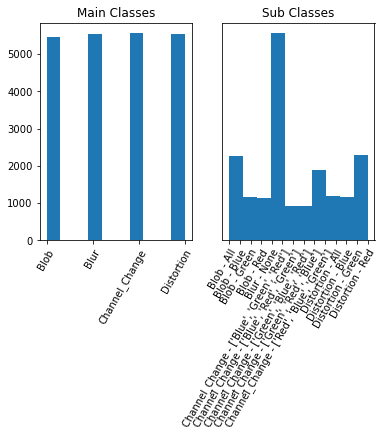

In [6]:
# show distribution of main and sub classes
fig = plt.figure(figsize = (8,2))
fig, axes = plt.subplots(nrows = 1, ncols = 2)

axes[0].hist(sorted(main_classes_list))
axes[0].set_title('Main Classes')

axes[1].hist(sorted(sub_classes_list))
axes[1].set_title('Sub Classes')
axes[1].get_yaxis().set_ticks([])

plt.draw()

for ax in axes:
    ax.set_xticklabels(
        ax.get_xticklabels()
        , rotation=60
        , ha='right'
        , rotation_mode='anchor'
    )